<a href="https://colab.research.google.com/github/Hatim-0101/LLM_Bootcamp/blob/main/Assessment_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: Submit a write-up on the following:

- Hugging face agents

- Hugging face pipeline for text generation

- HF inference endpoints

- Give feedback on the image generation and explore different models available on the Hugging Face website



#Assignment 2: Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine

#Objective

##In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:
- Generate captions for 15 different images.
- Build a search engine for these images using a larger dataset of images.


##Part 1: Generate Captions for Images

##Part 2: Build an Image Search Engine


##Submission
Submit the following as a **Streamlit** app:

- Your Python code for generating captions and building the search engine.
- A report describing your approach, challenges faced, and how you overcame them.
- Screenshots of the interface and results.

Evaluation Criteria

- Correctness and efficiency of the code.
- Clarity and completeness of the report.
- Usability and functionality of the search engine interface.

#Please don't use any Generative AI Models

1- Hugging Face agents:
Hugging Face agents are AI tools built on the Hugging Face platform for specific tasks or conversations. They use pre-trained language models, can be customized for various applications, and are deployable via the Hugging Face platform or APIs.

2- The Hugging Face pipeline for text generation simplifies text generation using pre-trained models by abstracting complex steps. It allows users to input prompts and receive generated text output easily, handling tokenization, model inference, and output processing automatically.

3- HF inference endpoints:
Hugging Face inference endpoints are API services that allow users to deploy and run machine learning models in the cloud.

4- Hugging Face hosts various image generation models, such as Stable Diffusion variants, DALL-E, and Midjourney-inspired models, each excelling in areas like photorealism, artistic styles, and prompt adherence. Users can explore model cards to understand each model's capabilities, limitations, and see example outputs, facilitating easy comparison and experimentation.

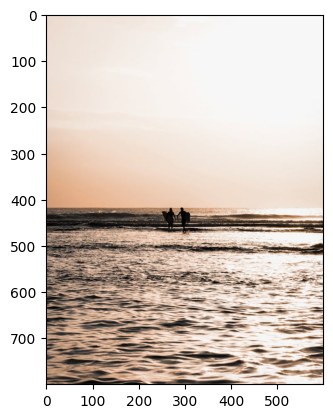

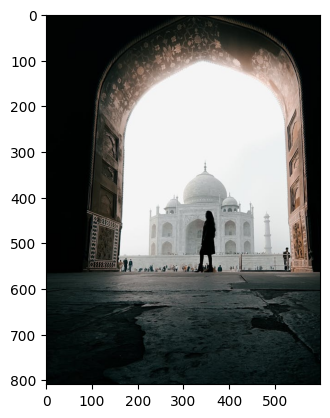

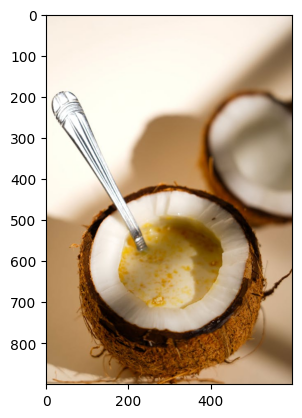

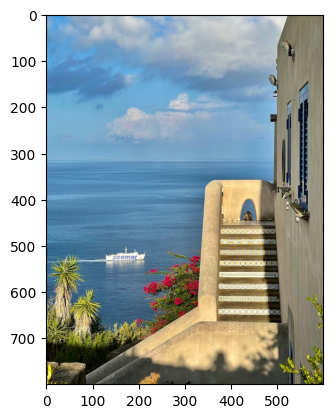

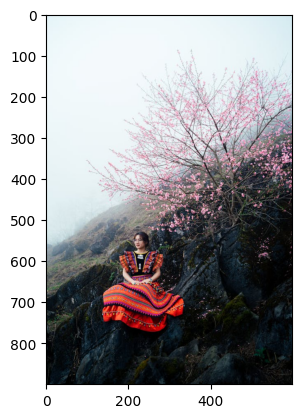

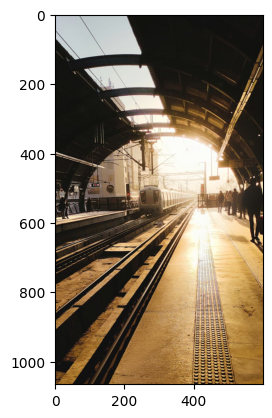

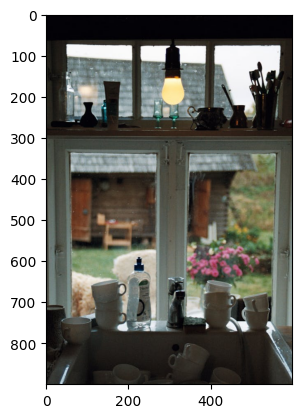

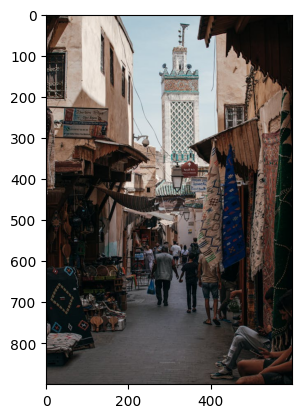

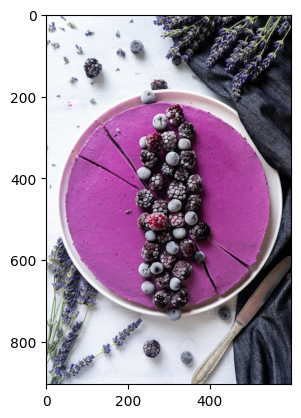

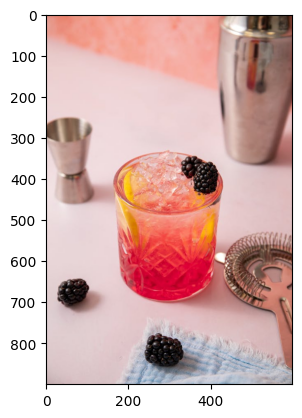

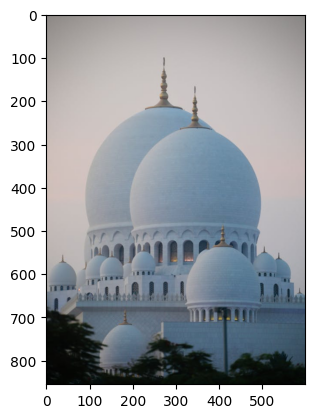

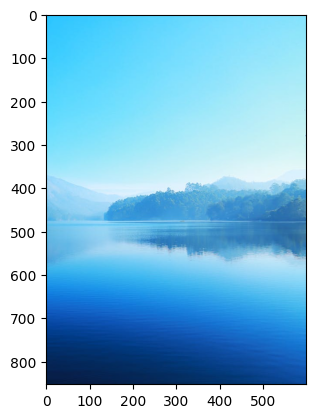

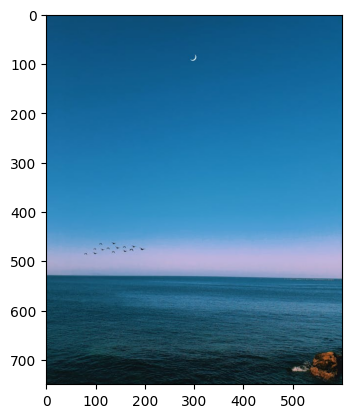

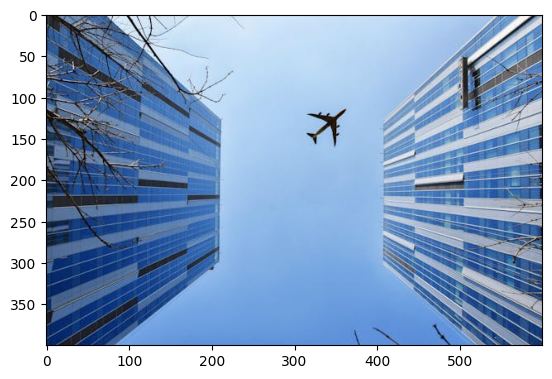

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests
import io
# Collect our data (Images)
urls = [
    "https://images.pexels.com/photos/27453216/pexels-photo-27453216/free-photo-of-two-people-walking-in-the-ocean-at-sunset.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/27377810/pexels-photo-27377810/free-photo-of-girl-silhouette-at-taj-mahal-india.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/27305400/pexels-photo-27305400/free-photo-of-coconut-oil-is-a-great-way-to-get-your-body-healthy.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/27409345/pexels-photo-27409345/free-photo-of-peaceful-evening.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/15968922/pexels-photo-15968922/free-photo-of-woman-posing-under-tree-in-spring.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/27420720/pexels-photo-27420720/free-photo-of-delhi-metro-subway-platform.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/20141600/pexels-photo-20141600/free-photo-of-photo-of-cups-standing-around-the-sink-by-the-window-in-a-kitchen.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/19190850/pexels-photo-19190850/free-photo-of-street-market-in-morocco.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/13804796/pexels-photo-13804796.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/27215761/pexels-photo-27215761/free-photo-of-bramble.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/27402099/pexels-photo-27402099/free-photo-of-the-white-domes-of-a-mosque-are-seen-in-the-distance.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load",
    "https://images.pexels.com/photos/40465/pexels-photo-40465.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/2102367/pexels-photo-2102367.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/747079/pexels-photo-747079.jpeg?auto=compress&cs=tinysrgb&w=600",

]

# let's discover our data and see what do we have?

images = []
for url in urls:
    response = requests.get(url, stream=True)
    img = Image.open(io.BytesIO(response.content))
    images.append(img)
for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [ ]:
# # Use a pipeline as a high-level helper
# from transformers import pipeline

# pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [ ]:
# Download our model (blib) input image , output : caption
from transformers import AutoProcessor, BlipForConditionalGeneration

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [ ]:
# apply the model on our data set
captions = []
for image in images:
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs)
    caption = processor.decode(out[0])
    captions.append(caption)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


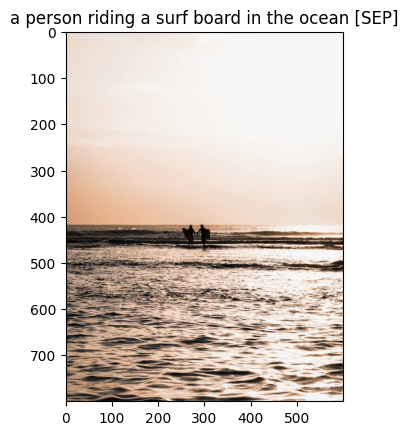

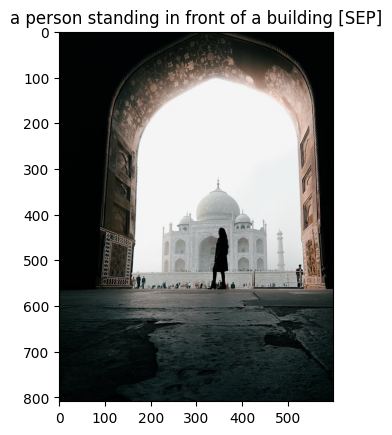

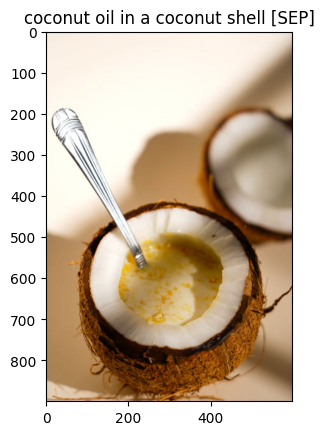

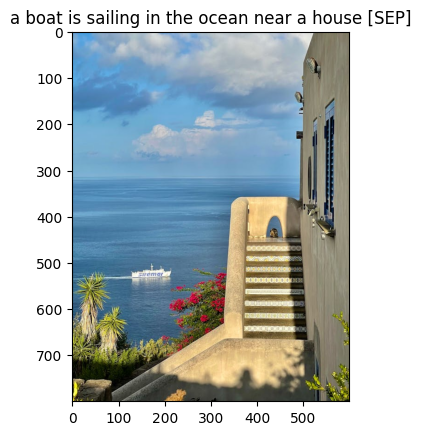

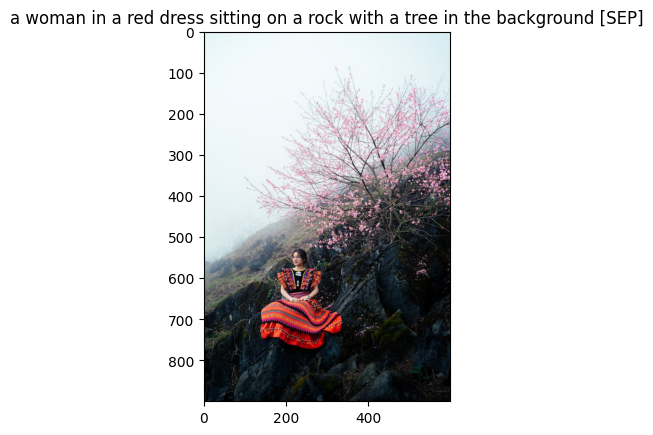

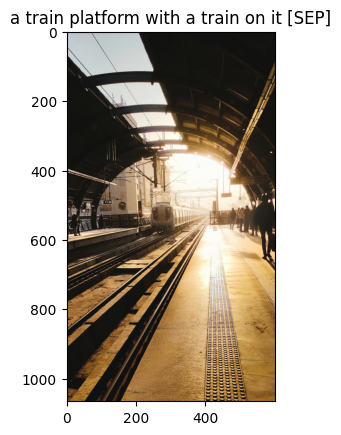

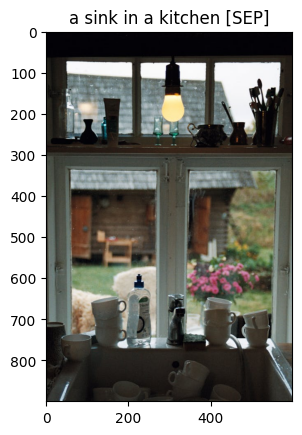

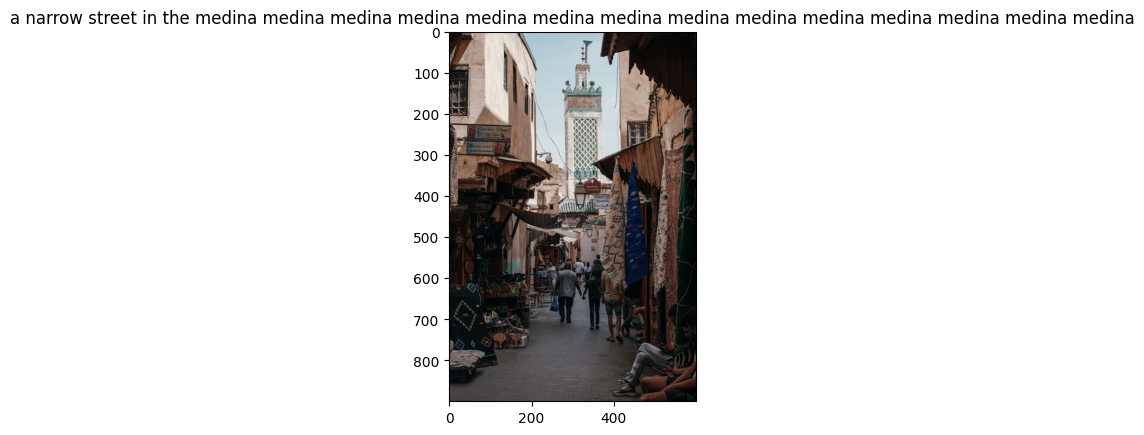

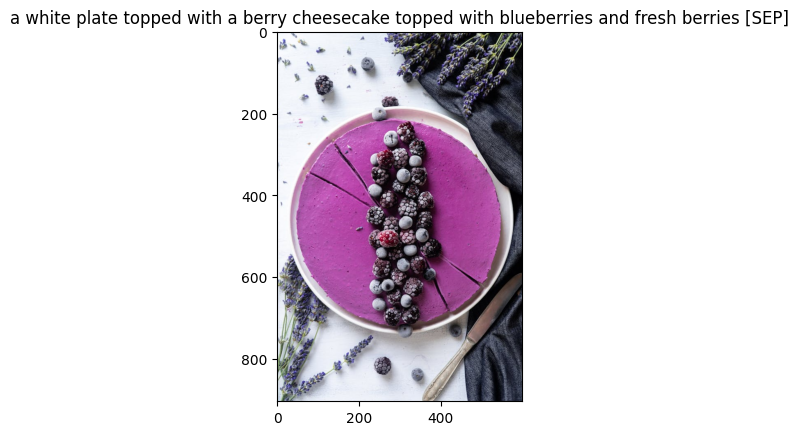

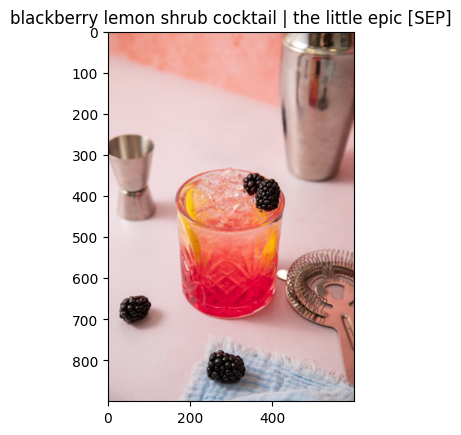

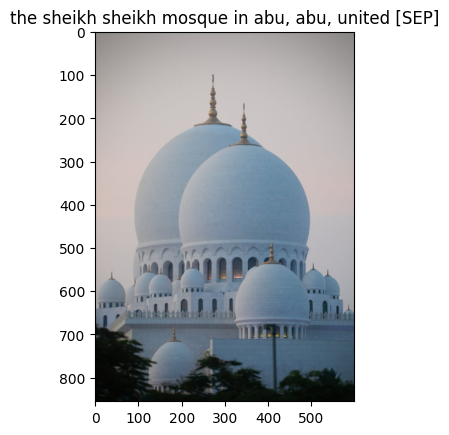

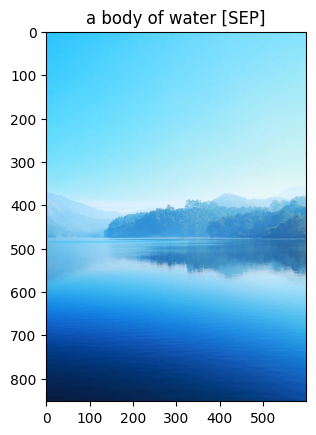

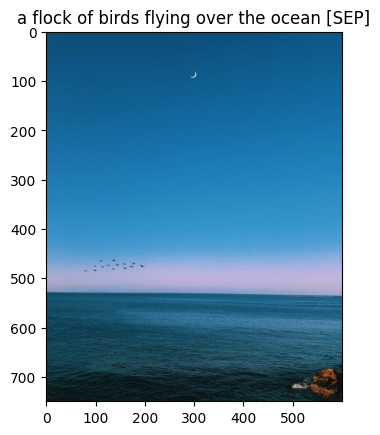

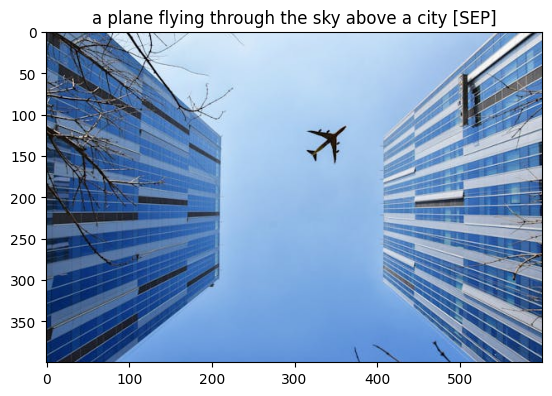

In [ ]:
# see the results
for image, caption in zip(images, captions):
    plt.imshow(np.asarray(image))
    plt.title(caption)
    plt.show()

In [ ]:
captions

['a person riding a surf board in the ocean',
 'a person standing in front of a building',
 'coconut oil in a coconut shell',
 'a boat is sailing in the ocean near a house',
 'a woman in a red dress sitting on a rock with a tree in the background',
 'a train platform with a train on it',
 'a sink in a kitchen',
 'a narrow street in the medina medina medina medina medina medina medina medina medina medina medina medina medina medina',
 'a white plate topped with a berry cheesecake topped with blueberries and fresh berries',
 'blackberry lemon shrub cocktail | the little epic',
 'the sheikh sheikh mosque in abu, abu, united',
 'a body of water',
 'a flock of birds flying over the ocean',
 'a plane flying through the sky above a city']

Time to work on Clip model

In [ ]:
# Download Clip model
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

a person riding a surf board in the ocean


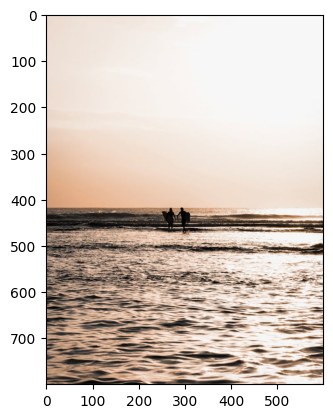

the sheikh sheikh mosque in abu, abu, united


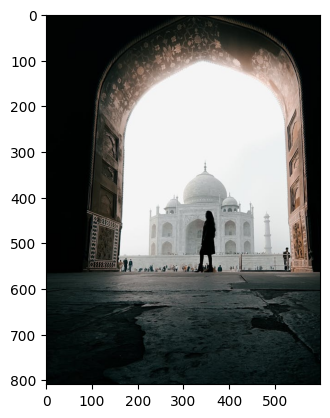

coconut oil in a coconut shell


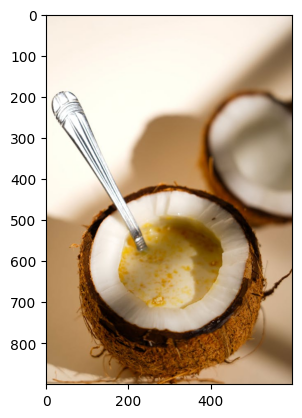

a boat is sailing in the ocean near a house


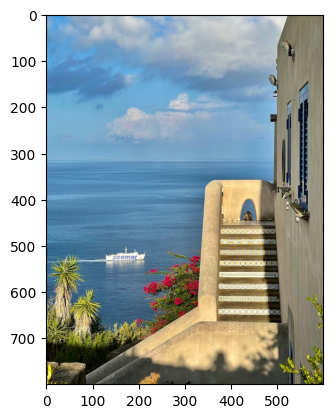

a woman in a red dress sitting on a rock with a tree in the background


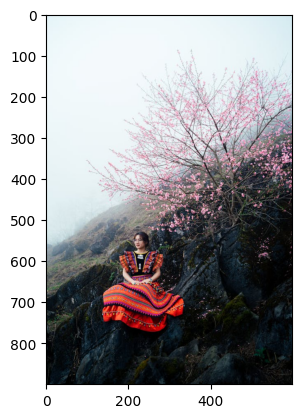

a train platform with a train on it


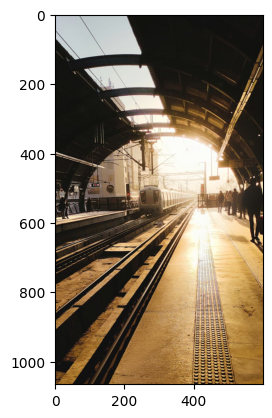

a sink in a kitchen


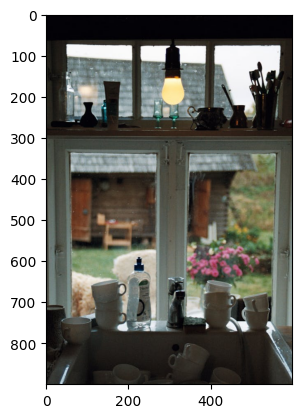

the sheikh sheikh mosque in abu, abu, united


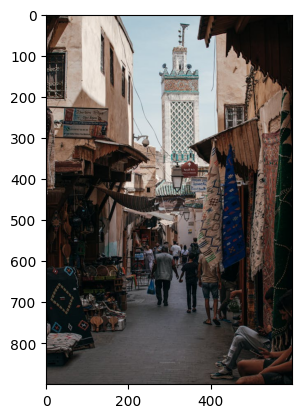

a white plate topped with a berry cheesecake topped with blueberries and fresh berries


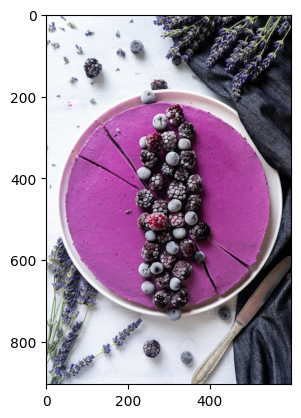

blackberry lemon shrub cocktail | the little epic


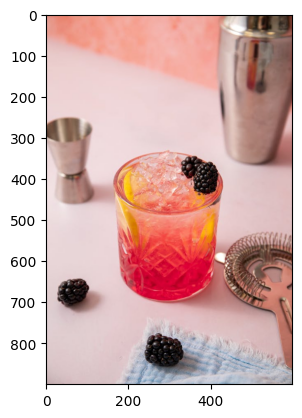

the sheikh sheikh mosque in abu, abu, united


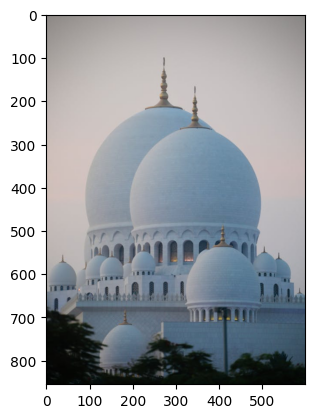

a body of water


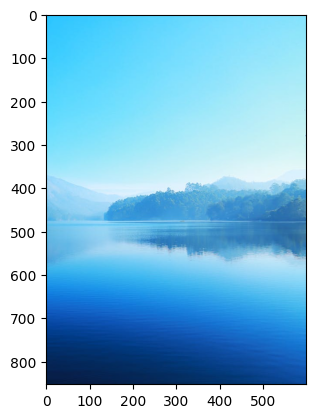

a flock of birds flying over the ocean


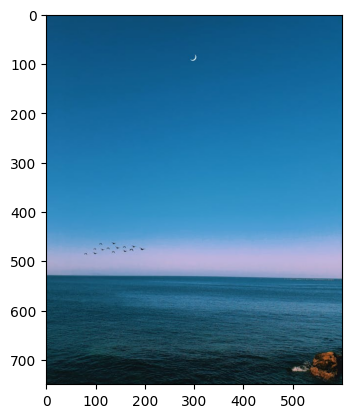

a plane flying through the sky above a city


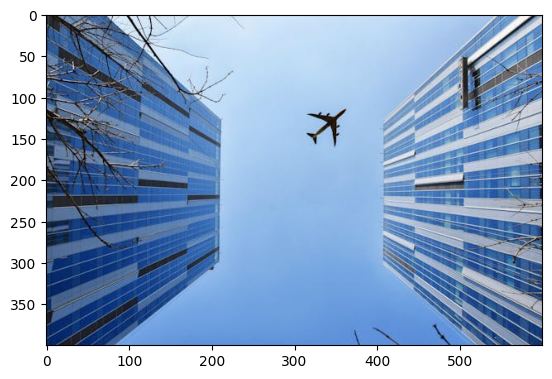

In [ ]:
# Apply the model on our data that came from bit model and see the results and it gave us a realy good results
inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)
probs
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(captions[argmax])
    plt.show(plt.imshow(np.asarray(image)))